In [1]:
import pandas as pd

# LOADING DATASET

In [2]:
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [3]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [4]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [5]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


# MERGING THE DATASET

In [6]:
df = pd.merge(train, features, on=["Store", "Date"], how="left")


In [7]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [8]:
df.shape

(421570, 15)

In [9]:
df = pd.merge(df, stores, on="Store", how="left")


In [10]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315


In [11]:
df.shape

(421570, 17)

In [12]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

# CONVERT DATE TO DATETIME FORMAT

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["Day"] = df["Date"].dt.day

# CONVERT BOOLEAN HOLIDAY TO INTEGER

In [14]:
df["IsHoliday_x"] = df["IsHoliday_x"].astype(int)


# SORT DATE BY DATE

In [15]:
df=df.sort_values("Date")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  int32         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421570 n

In [17]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,2,5,5
277665,29,5,2010-02-05,15552.08,0,24.36,2.788,NaN,NaN,NaN,...,NaN,131.527903,10.064,False,B,93638,2010,2,5,5


# HANDLING MISSING VALUES

In [18]:
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[markdown_cols] = df[markdown_cols].fillna(0)
print(df[markdown_cols].isnull().sum())

MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


# ONE HOT ENCODE CATEGORICAL VARIABLE

In [19]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [20]:
df.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Size,Year,Month,Week,Day,Type_B,Type_C
269954,28,23,2010-02-05,34467.26,0,49.47,2.962,0.00,0.0,0.00,...,126.442065,13.975,False,206302,2010,2,5,5,False,False
137324,14,92,2012-05-11,194034.68,0,61.24,3.889,10626.27,0.0,131.11,...,190.976417,8.567,False,200898,2012,5,19,11,False,False
48954,6,2,2010-07-09,53622.15,0,80.93,2.642,0.00,0.0,0.00,...,212.629655,6.973,False,202505,2010,7,27,9,False,False
254508,26,79,2011-07-29,12398.01,0,63.32,3.898,0.00,0.0,0.00,...,135.963935,7.767,False,152513,2011,7,30,29,False,False
64158,7,41,2010-03-19,2195.90,0,29.04,2.692,0.00,0.0,0.00,...,189.734262,9.014,False,70713,2010,3,11,19,True,False


# Checking Dupicates

In [21]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday_x, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday_y, Size, Year, Month, Week, Day, Type_B, Type_C]
Index: []

[0 rows x 22 columns]


In [22]:
df = df.drop('IsHoliday_y', axis=1)
print(df['IsHoliday_x'].value_counts())


IsHoliday_x
0    391909
1     29661
Name: count, dtype: int64


In [23]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,Day,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,151315,2010,2,5,5,False,False
277665,29,5,2010-02-05,15552.08,0,24.36,2.788,0.0,0.0,0.0,...,0.0,131.527903,10.064,93638,2010,2,5,5,True,False


# Multiple Linear Regression

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
features = ['Store', 'Dept','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_x','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Size']  # choose based on EDA
X = df[features]
y = df['Weekly_Sales'] 


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.08759603547429695
RMSE: 21781.89053609102


In [29]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Store          -85.673696
Dept           111.404928
Temperature     27.365432
Fuel_Price    -571.483842
CPI            -23.877200
Unemployment  -165.852633
IsHoliday_x    671.587689
MarkDown1       -0.015255
MarkDown2        0.008864
MarkDown3        0.117037
MarkDown4        0.036621
MarkDown5        0.083810
Size             0.086061


# Using Non Linear Regression Analysis

## 1)RandomForestRegressor

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Checkpoint: Cell is running")

# Predict
y_pred = model.predict(X_test)


# Evaluate
print("R-squared_RFR:", r2_score(y_test, y_pred))
print("RMSE_RFR:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
print(importances.sort_values("Importance", ascending=False))

Checkpoint: Cell is running
R-squared: 0.953191829596667
RMSE: 4933.587356243589
              Importance
Dept            0.619270
Size            0.191296
Store           0.068479
CPI             0.035835
Temperature     0.022490
MarkDown3       0.019891
Fuel_Price      0.016202
Unemployment    0.014484
IsHoliday_x     0.003775
MarkDown4       0.002456
MarkDown5       0.002292
MarkDown2       0.001794
MarkDown1       0.001737


## 2)HistGradientBoostingRegresssor

In [31]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

model = HistGradientBoostingRegressor( max_iter=200,
    learning_rate=0.05,
    max_depth=8,
    random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared_HGBR:", r2_score(y_test, y_pred))
print("RMSE_HGBR:", np.sqrt(mean_squared_error(y_test, y_pred))) 

R-squared: 0.8844304102720357
RMSE: 7752.178696033755


In [32]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Compute permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Convert to DataFrame
importances_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})

# Sort and display
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

         Feature  Importance
1           Dept    1.485540
12          Size    0.442309
0          Store    0.109912
4            CPI    0.029981
9      MarkDown3    0.017259
2    Temperature    0.006151
5   Unemployment    0.004277
3     Fuel_Price    0.003582
6    IsHoliday_x    0.002028
10     MarkDown4    0.001551
11     MarkDown5    0.000383
8      MarkDown2    0.000353
7      MarkDown1    0.000032


In [46]:
%%capture
!pip install lightgbm

## 3)lightGBM

In [47]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'df' is your DataFrame containing the dataset
features = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_x',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size']
X = df[features]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for the model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Feature importance
importances = model.feature_importance(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)
   

ModuleNotFoundError: No module named 'lightgbm'

In [38]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared_DTR:", r2_score(y_test, y_pred))
print("RMSE_DTR:", np.sqrt(mean_squared_error(y_test, y_pred)))

importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
print(importances.sort_values("Importance", ascending=False))

R-squared_DTR: 0.9186813376276488
RMSE_DTR: 6502.750669265445
              Importance
Dept            0.628478
Size            0.187049
Store           0.067649
CPI             0.034271
MarkDown3       0.019747
Temperature     0.019683
Fuel_Price      0.017284
Unemployment    0.014003
IsHoliday_x     0.003684
MarkDown4       0.002717
MarkDown5       0.002114
MarkDown2       0.001671
MarkDown1       0.001648


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error
model = BayesianRidge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

R-squared: 0.08757976949984103
RMSE: 21782.084694659898
         Feature  Importance
12          Size    0.108665
1           Dept    0.043856
0          Store    0.005321
4            CPI    0.002864
9      MarkDown3    0.001608
2    Temperature    0.000895
11     MarkDown5    0.000567
5   Unemployment    0.000368
3     Fuel_Price    0.000244
10     MarkDown4    0.000101
6    IsHoliday_x    0.000066
7      MarkDown1    0.000034
8      MarkDown2   -0.000010


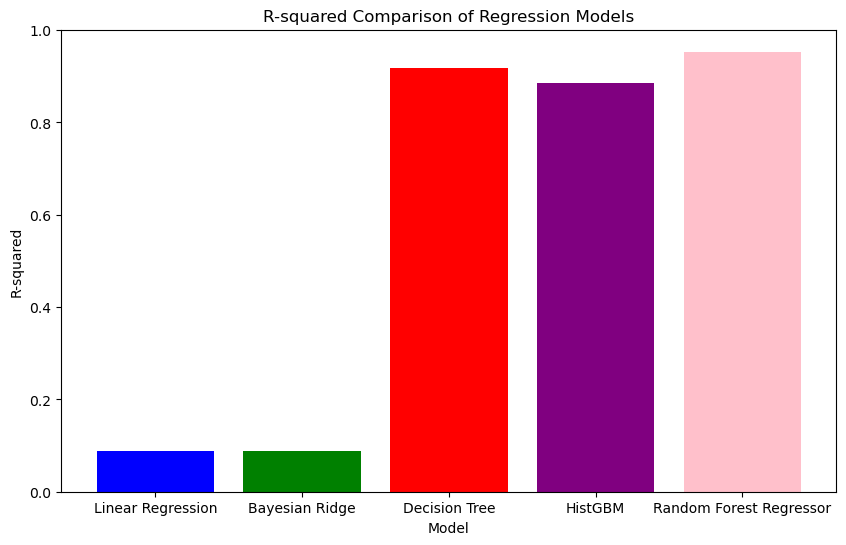

In [48]:
import matplotlib.pyplot as plt
r2_scores = {
    'Linear Regression':  0.08759603547429695,
    'Bayesian Ridge':  0.08757976949984103,
    'Decision Tree': 0.9186813376276488,
    'HistGBM':  0.8844304102720357,
    'Random Forest Regressor' : 0.953191829596667
}
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple','pink'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.show()

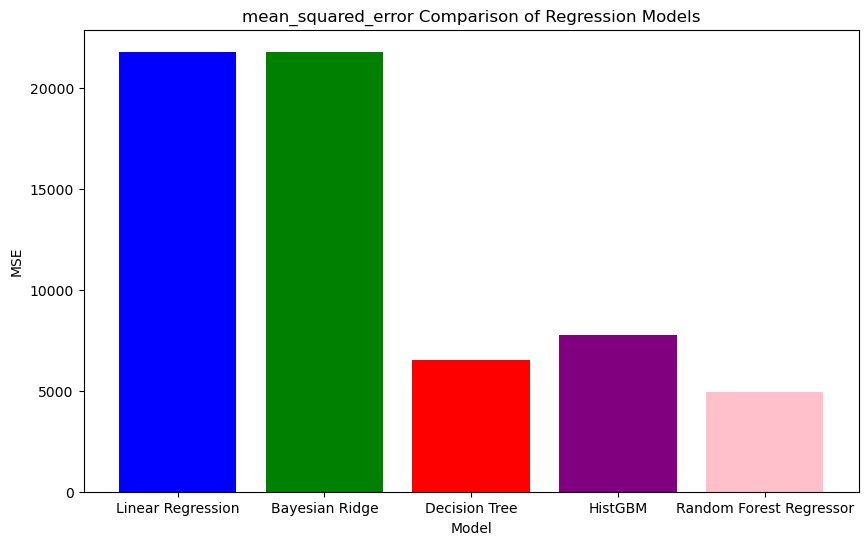

In [49]:
import matplotlib.pyplot as plt
mean_squared_error = {
    'Linear Regression': 21781.89053609102 ,
    'Bayesian Ridge':  21782.084694659898,
    'Decision Tree': 6502.750669265445,
    'HistGBM':  7752.178696033755,
    'Random Forest Regressor' : 4933.587356243589
}
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_error.keys(), mean_squared_error.values(), color=['blue', 'green', 'red', 'purple','pink'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('mean_squared_error Comparison of Regression Models')
plt.show()